In [1]:
%load_ext autoreload
import sys
sys.path.append('../..')

In [2]:
import numpy as np

In [3]:
import cv2
import os
import pandas as pd

In [4]:
video_path = '/home/paulo/Vídeos/bolso_daciolo.mp4'

# Extract Video Frames

In [7]:
dir_path = video_path.split('.')[0]
dir_path

'/home/paulo/Vídeos/bolso_daciolo'

In [8]:
cap=cv2.VideoCapture(video_path)

In [9]:
fps = int(round(cap.get(cv2.CAP_PROP_FPS)))

In [10]:
fps

30

In [11]:
if os.path.isdir(dir_path):
    os.rmdir(dir_path)
os.mkdir(dir_path)

In [12]:
i=1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    if i%fps == 0:
        cv2.imwrite(f'{dir_path}/frame_{i}.jpg',frame)
    i+=1

## Get urls

In [13]:
from faces_clustering import get_files_folder, FeatureExtractor

Using TensorFlow backend.


In [14]:
from tqdm import tqdm

In [15]:
extractor = FeatureExtractor('senet50')

In [16]:
frames_url = get_files_folder(dir_path)

In [17]:
faces_dict = {}
for url in tqdm(frames_url):
    faces_dict[url] = extractor.get_embeddings(url)


100%|██████████| 226/226 [02:07<00:00,  1.77it/s]


In [18]:
all_urls = []
all_faces = []
all_embs = []
for url in frames_url:
    embs, faces = faces_dict[url]
    for emb, face in zip(embs, faces):
        all_urls.append(url)
        all_faces.append(face)
        all_embs.append(emb)

In [19]:
dt_sw = pd.DataFrame(all_urls, columns=['urls'])

In [20]:
dt_sw['embeddings'] = all_embs
dt_sw['faces'] = all_faces

In [21]:
dt_sw.head()

,urls,embeddings,faces
0,/home/paulo/Vídeos/bolso_daciolo/frame_6390.jpg,"[0.0058827386, 0.35295942, 0.03619966, 0.00135...","[[[28, 51, 147], [27, 50, 145], [29, 52, 146],..."
1,/home/paulo/Vídeos/bolso_daciolo/frame_3150.jpg,"[0.017929172, 0.1735159, 0.47569782, 0.0, 5.92...","[[[24, 36, 110], [27, 38, 109], [27, 37, 105],..."
2,/home/paulo/Vídeos/bolso_daciolo/frame_4050.jpg,"[0.014869179, 7.579201, 0.06947487, 4.6544104,...","[[[19, 18, 62], [20, 18, 57], [23, 20, 54], [2..."
3,/home/paulo/Vídeos/bolso_daciolo/frame_3210.jpg,"[0.008981287, 0.46424603, 0.028842276, 0.0, 6....","[[[32, 55, 148], [30, 53, 146], [28, 51, 144],..."
4,/home/paulo/Vídeos/bolso_daciolo/frame_5820.jpg,"[0.004510961, 0.02672887, 0.3407471, 0.0052856...","[[[16, 15, 46], [18, 19, 47], [24, 25, 53], [2..."


In [22]:
dt_sw.to_pickle(f'{video_path}.pkl')

# Clustering

In [5]:
from faces_clustering import Clusterer, silhuoette

Using TensorFlow backend.


In [6]:
dt_sw = pd.read_pickle(f'{video_path}.pkl')
dt_sw.shape

(253, 3)

In [7]:
valid = dt_sw.embeddings.apply(lambda x: str(x) != '-')
dt_sw = dt_sw.loc[valid]

In [8]:
dt_sw.shape

(253, 3)

In [9]:
embs = [list(emb) for emb in dt_sw.embeddings.values]


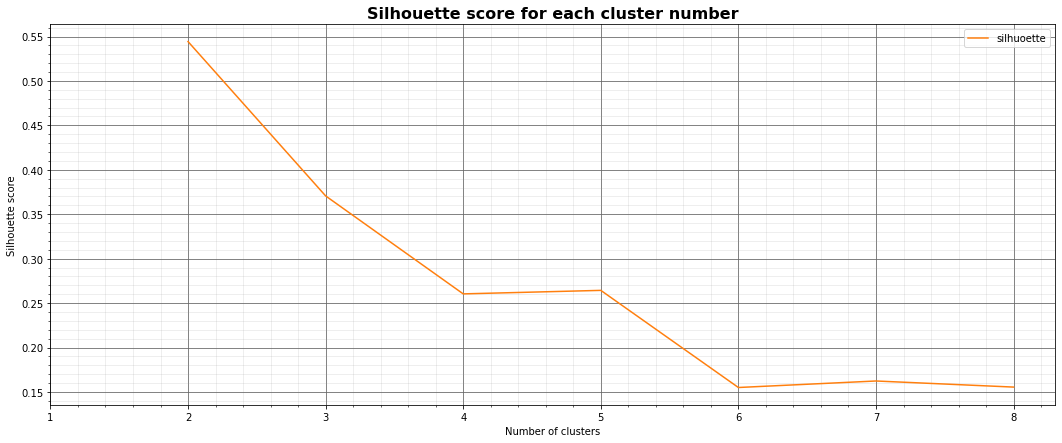

2

In [10]:
silhuoette(embs,alg = "agglomerative")

In [11]:
dt_sw.head()

,urls,embeddings,faces
0,/home/paulo/Vídeos/bolso_daciolo/frame_6390.jpg,"[0.0058827386, 0.35295942, 0.03619966, 0.00135...","[[[28, 51, 147], [27, 50, 145], [29, 52, 146],..."
1,/home/paulo/Vídeos/bolso_daciolo/frame_3150.jpg,"[0.017929172, 0.1735159, 0.47569782, 0.0, 5.92...","[[[24, 36, 110], [27, 38, 109], [27, 37, 105],..."
2,/home/paulo/Vídeos/bolso_daciolo/frame_4050.jpg,"[0.014869179, 7.579201, 0.06947487, 4.6544104,...","[[[19, 18, 62], [20, 18, 57], [23, 20, 54], [2..."
3,/home/paulo/Vídeos/bolso_daciolo/frame_3210.jpg,"[0.008981287, 0.46424603, 0.028842276, 0.0, 6....","[[[32, 55, 148], [30, 53, 146], [28, 51, 144],..."
4,/home/paulo/Vídeos/bolso_daciolo/frame_5820.jpg,"[0.004510961, 0.02672887, 0.3407471, 0.0052856...","[[[16, 15, 46], [18, 19, 47], [24, 25, 53], [2..."


In [29]:
alg = 'kmeans'

In [30]:
clusterer = Clusterer(n_clusters = 2, face_embeddings = dt_sw,algs=[alg])

In [31]:
clusters, _ = clusterer.clusterize()

In [32]:
clusters.head()

,urls,embeddings,faces,cluster_kmeans
0,/home/paulo/Vídeos/bolso_daciolo/frame_6390.jpg,"[0.0058827386, 0.35295942, 0.03619966, 0.00135...","[[[28, 51, 147], [27, 50, 145], [29, 52, 146],...",1
1,/home/paulo/Vídeos/bolso_daciolo/frame_3150.jpg,"[0.017929172, 0.1735159, 0.47569782, 0.0, 5.92...","[[[24, 36, 110], [27, 38, 109], [27, 37, 105],...",1
2,/home/paulo/Vídeos/bolso_daciolo/frame_4050.jpg,"[0.014869179, 7.579201, 0.06947487, 4.6544104,...","[[[19, 18, 62], [20, 18, 57], [23, 20, 54], [2...",0
3,/home/paulo/Vídeos/bolso_daciolo/frame_3210.jpg,"[0.008981287, 0.46424603, 0.028842276, 0.0, 6....","[[[32, 55, 148], [30, 53, 146], [28, 51, 144],...",1
4,/home/paulo/Vídeos/bolso_daciolo/frame_5820.jpg,"[0.004510961, 0.02672887, 0.3407471, 0.0052856...","[[[16, 15, 46], [18, 19, 47], [24, 25, 53], [2...",1


In [33]:
faces_samples = clusters[[f'cluster_{alg}','faces']].sort_values(
    f'cluster_{alg}').groupby(f'cluster_{alg}').head(1).faces.values

In [34]:
colors = list(np.random.random(size=(len(faces_samples),3)) * 256)

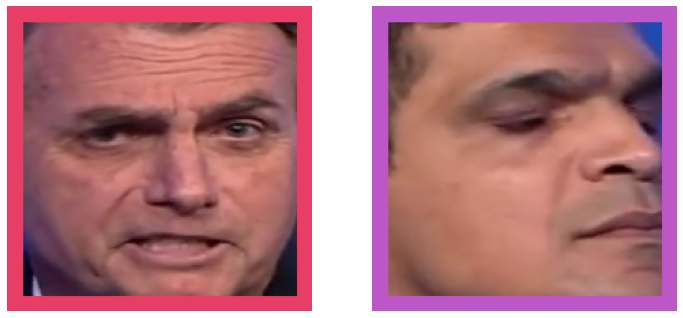

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(faces_samples), figsize=(12, 7))
#fig.tight_layout()
#fig.subplots_adjust(hspace=0, wspace=0)
i = 0
for sample in faces_samples:
    #axes.figure(figsize=(2,3))
    image = cv2.rectangle(sample, (0,0), sample.shape[0:2], colors[i], int(sample.shape[0]/10))
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_aspect('equal')
    i = i+1

# Clusters by frame

In [36]:
clusters_urls = clusters[[f'cluster_{alg}','urls']]

In [37]:
frames = clusters_urls.urls.apply(lambda x: int(x.split('.')[0].split('/')[-1].split('_')[-1]))

In [38]:
clusters_frames = clusters_urls[[f'cluster_{alg}']]

In [39]:
clusters_frames['frames'] = frames

In [40]:
cluster_by_frames = clusters_frames.groupby('frames')[f'cluster_{alg}'].apply(list)

In [41]:
cluster_by_frames = cluster_by_frames.apply(np.sort)

In [42]:
cluster_by_frames = pd.DataFrame(cluster_by_frames)

In [43]:
cluster_by_frames.head()

,cluster_kmeans
frames,
30,[0]
60,[0]
90,[0]
120,[0]
150,"[0, 1]"


# Display Timeline

In [44]:
import matplotlib.gridspec as gridspec
from tqdm import tqdm

In [45]:
def draw_lines(frame, clusters):
    thumb = f'{dir_path}/frame_{frame}.jpg'
    img = cv2.imread(thumb)
    test = img[:,:,::-1].copy()
    for c in clusters:

        line_thickness = int((img.shape[0]/3)/len(faces_samples))

        test = cv2.line(test, (0,test.shape[0]-line_thickness*(c+1)), 
                 (img.shape[1]-1,test.shape[0]-line_thickness*(c+1)), colors[c], thickness=line_thickness)

    return test

100%|██████████| 60/60 [00:03<00:00, 19.54it/s]


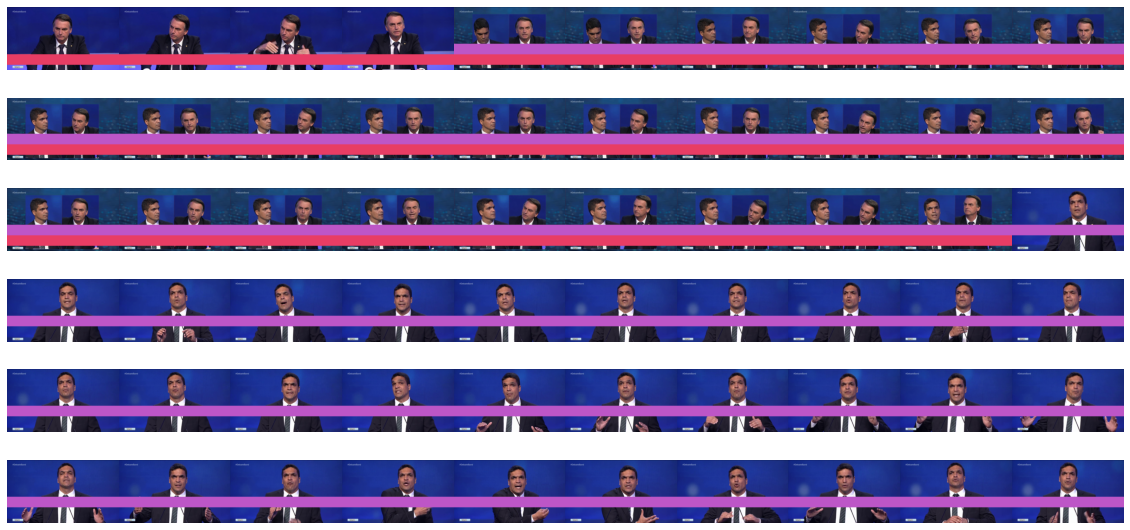

In [48]:
plt.figure(figsize = (20,100))
gs1 = gridspec.GridSpec(60, 10)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 
i = 0
for frame in tqdm(cluster_by_frames.head(60).index.values):
    thumb = draw_lines(frame, cluster_by_frames.loc[frame][0])
    
    ax1 = plt.subplot(gs1[i])  
    plt.subplots_adjust(hspace=0, wspace=0)
    ax1.imshow(thumb)
    ax1.axis('off')
    #ax1.set_aspect('equal')
    
    i = i + 1